### **1. Importing Zipfile from Kaggle**

In [30]:
!pip install kaggle

In [31]:
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [32]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
!pip install imbalanced-learn

### **2. Extracting Zipfile**

In [34]:
import zipfile
dataset = "/content/creditcardfraud.zip"

with zipfile.ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

### **3. Importing Libraries**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [36]:
import warnings
warnings.filterwarnings("ignore")

### **4. Loading Dataset**

In [37]:
card = pd.read_csv("/content/extracted_folder/creditcard.csv")

In [38]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
card.shape

(284807, 31)

In [40]:
card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [41]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [42]:
card["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### **5. Exploratory Data Analysis**

### **5.1 Correlation Heatmap**

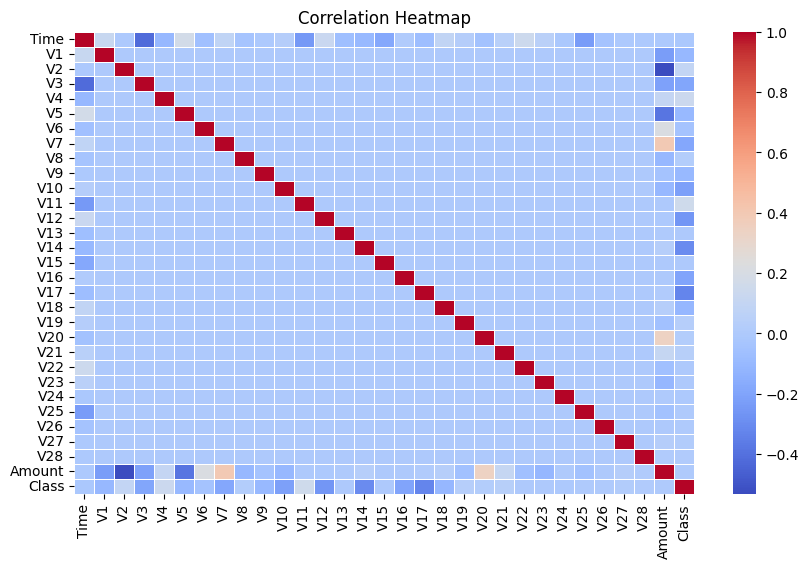

In [43]:
correl = card.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correl, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **5.2 Lineplot of "Amount"**

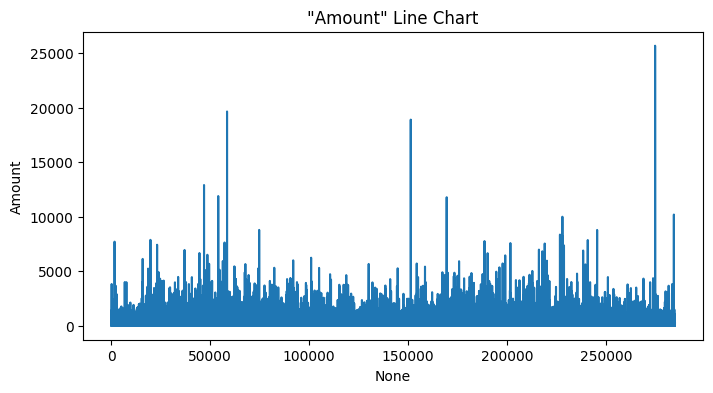

In [44]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=card.index, y=card['Amount'])
plt.title('"Amount" Line Chart')
plt.show()

### **5.3 PieChart for "Class"**

***********************************
Value Distribution
0    284315
1       492
Name: Class, dtype: int64
*****************************
Percentage of Distribution
Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


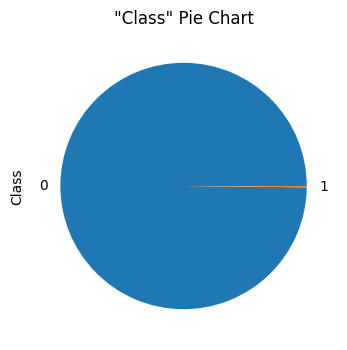

In [45]:
plt.figure(figsize=(8, 4))
print("***********************************")
print("Value Distribution")
print(card["Class"].value_counts())
print("*****************************")
print("Percentage of Distribution")
print((card.groupby('Class')['Class'].count()/card['Class'].count())*100)
((card.groupby('Class')['Class'].count()/card['Class'].count())*100).plot.pie()
plt.title('"Class" Pie Chart')
plt.show()

### **5.4 Amount vs Class**

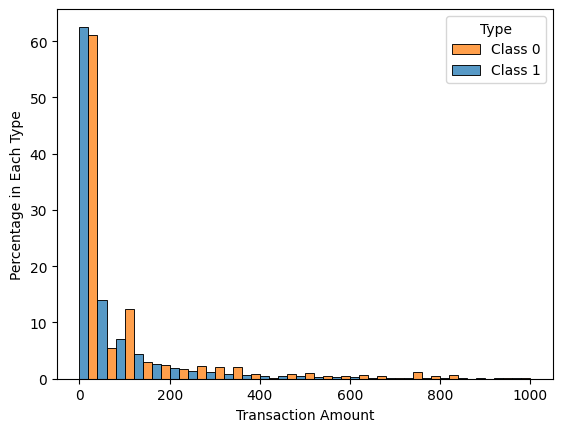

In [46]:
ax=sns.histplot(x='Amount',data=card[card.Amount<=1000],hue='Class',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount')
plt.legend(title='Type', labels=['Class 0', 'Class 1'])

### **6. Reducing the dataset**

In [47]:
reduced_data = card.sample(n=20000, random_state=42)
reduced_data.to_csv('reduced_dataset.csv', index=False)

## **7. Splitting data for Training and Testing**

In [48]:
reduced_data = pd.read_csv('reduced_dataset.csv')

X = reduced_data.drop(['Class','Time'], axis=1)
Y = reduced_data['Class']

rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resample, Y_resample = rus.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_resample, Y_resample, test_size=0.2, random_state=42)

### **8. Model Training and Evaluation**

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

print("***********************DECISION TREE CLASSIFIER***************************")
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix:\n")
print(conf_matrix)

print("\n\n******************************************************************\n\n")
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

print("\n\n******************************************************************\n\n")
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on The Test Data:", accuracy * 100)


***********************DECISION TREE CLASSIFIER***************************

Confusion Matrix:

[[8 0]
 [1 5]]


******************************************************************


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.83      0.91         6

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



******************************************************************


Accuracy on The Test Data: 92.85714285714286
